In [1]:
# Bibliotecas Gerais
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings
import numpy as np
from numpy import array
from importlib import reload
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227

In [2]:
# Pacotes Customizados
import functions
import plotting

In [3]:
np.random.seed(666)

In [4]:
df = pd.read_parquet('data/eth.parquet')
df['Date'] = df.index
df = df.rename(columns = {'close': 'Close',
                          'volume': 'Volume',
                          'rsi': 'RSI',
                          'upper_band': 'Upper_band',
                          'lower_band': 'Lower_band',
                          'macd': 'MACD',
                          'signal': 'Signal'}, inplace = False)
df.tail(5)

,const,Close,Volume,number_of_trades,target,return,change,volatility,momentum,RSI,...,Signal,Upper_band,Lower_band,lag_1,lag_2,ma_10,ma_30,ratio_ma,time,Date
open_time,,,,,,,,,,,,,,,,,,,,,
2021-07-24 23:45:00,1.0,2179.860107,1300.048828,902,0.187301,0.000,0.330078,6.054524,2173.360107,71.037719,...,2.521047,2180.555335,2167.867563,0.015142,0.069730,2176.043042,2171.665348,1.002016,1080676,2021-07-24 23:45:00
2021-07-24 23:46:00,1.0,2182.830078,331.235748,691,0.071921,0.001,2.969971,6.421120,2175.340088,75.556492,...,2.653594,2181.795689,2167.937686,0.136061,0.151182,2176.889038,2172.327018,1.002100,1080677,2021-07-24 23:46:00
2021-07-24 23:47:00,1.0,2183.770020,1082.394287,1633,0.038328,0.000,0.939941,6.784248,2176.530029,76.790686,...,2.817971,2182.843086,2168.386476,0.043042,0.179044,2177.910034,2172.953019,1.002281,1080678,2021-07-24 23:47:00
2021-07-24 23:48:00,1.0,2181.830078,358.079468,698,0.149274,-0.001,-1.939941,6.939893,2176.860107,69.042358,...,2.956309,2183.486715,2168.806672,-0.088913,-0.045833,2178.670044,2173.527686,1.002366,1080679,2021-07-24 23:48:00
2021-07-24 23:49:00,1.0,2183.500000,205.055878,498,0.078406,0.001,1.669922,7.164565,2179.830078,71.690403,...,3.090977,2184.330156,2169.172751,0.076479,-0.012366,2179.573047,2174.077686,1.002528,1080680,2021-07-24 23:49:00


Number of Trades: 100
Time Frame: 0 days
Profit: $-73782.52 | -73.78%


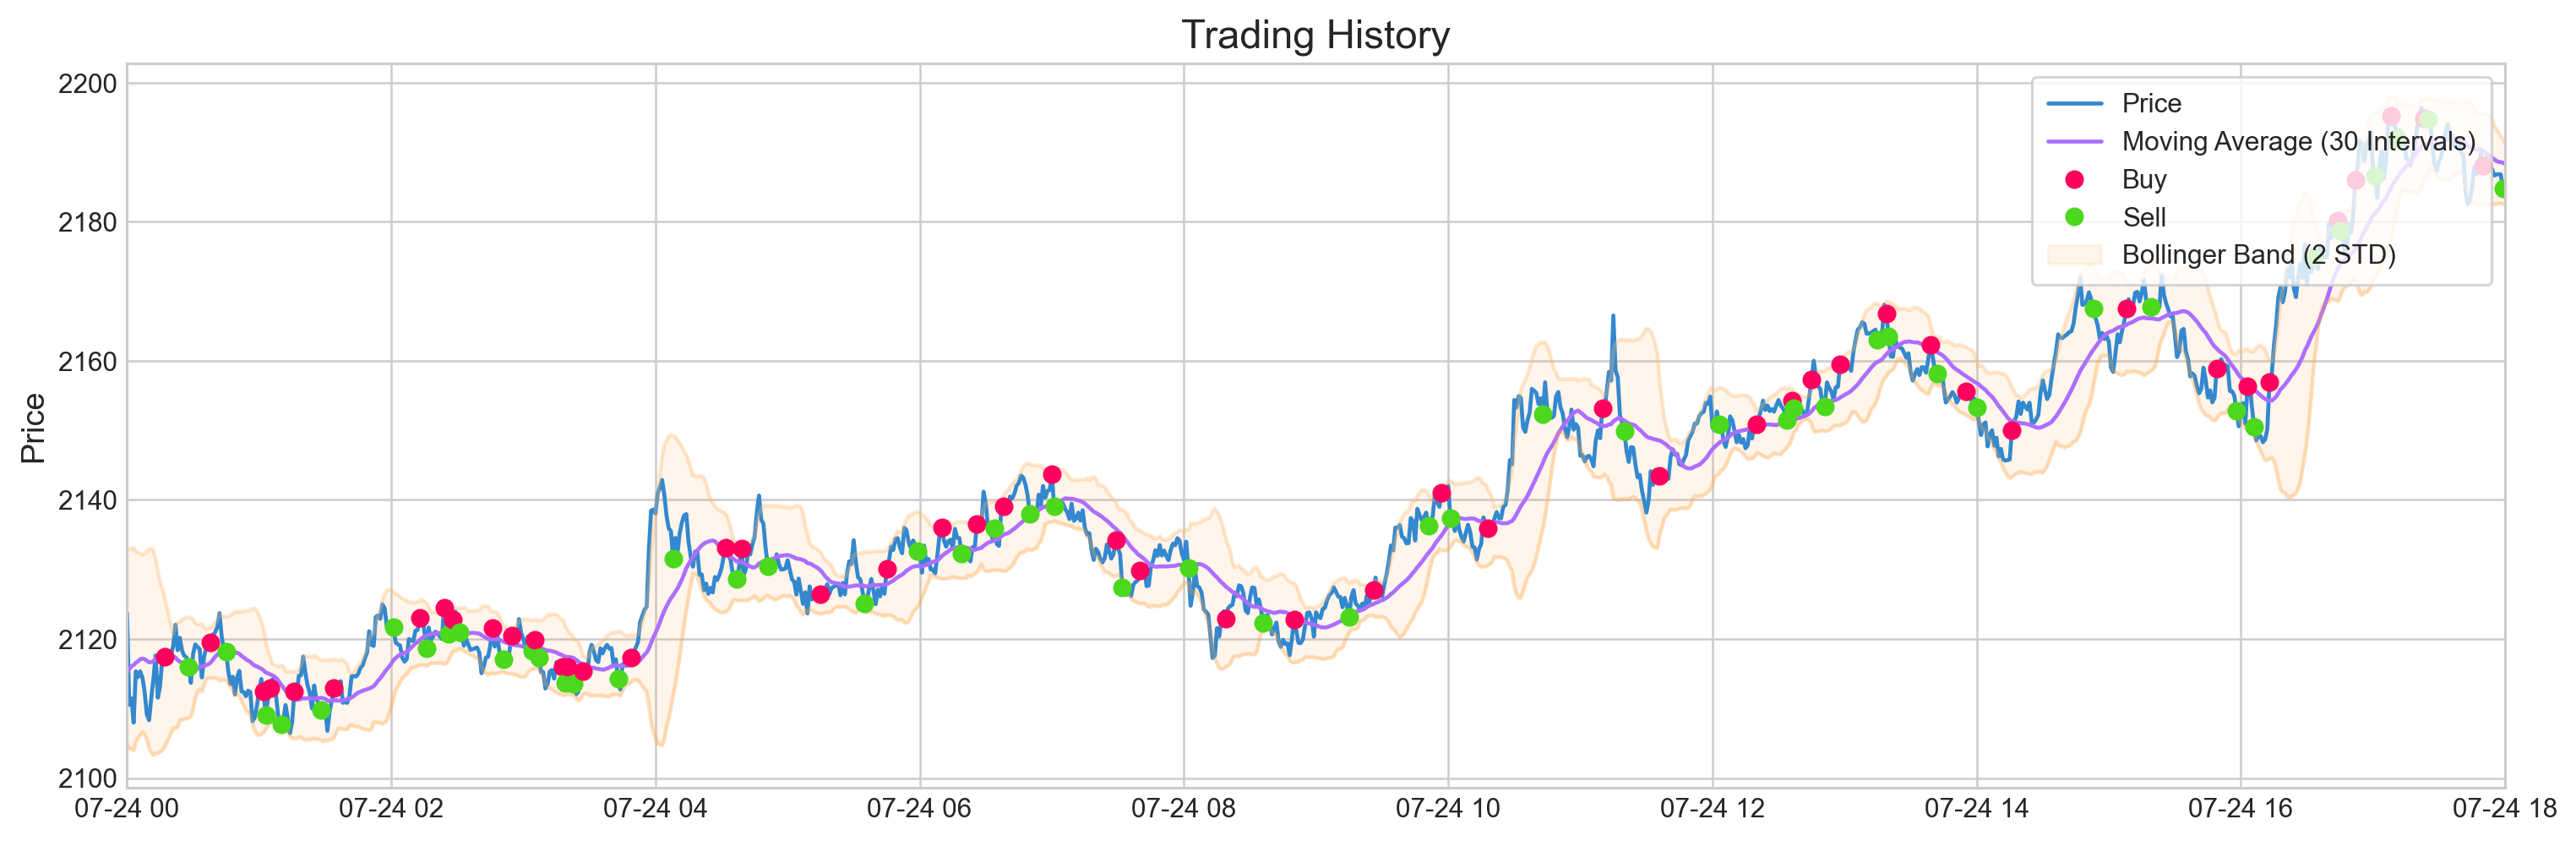

In [5]:
profit, trades = functions.macd_trading(df.loc['2021-07-24 00:00:00':'2021-07-24 18:00:00'])

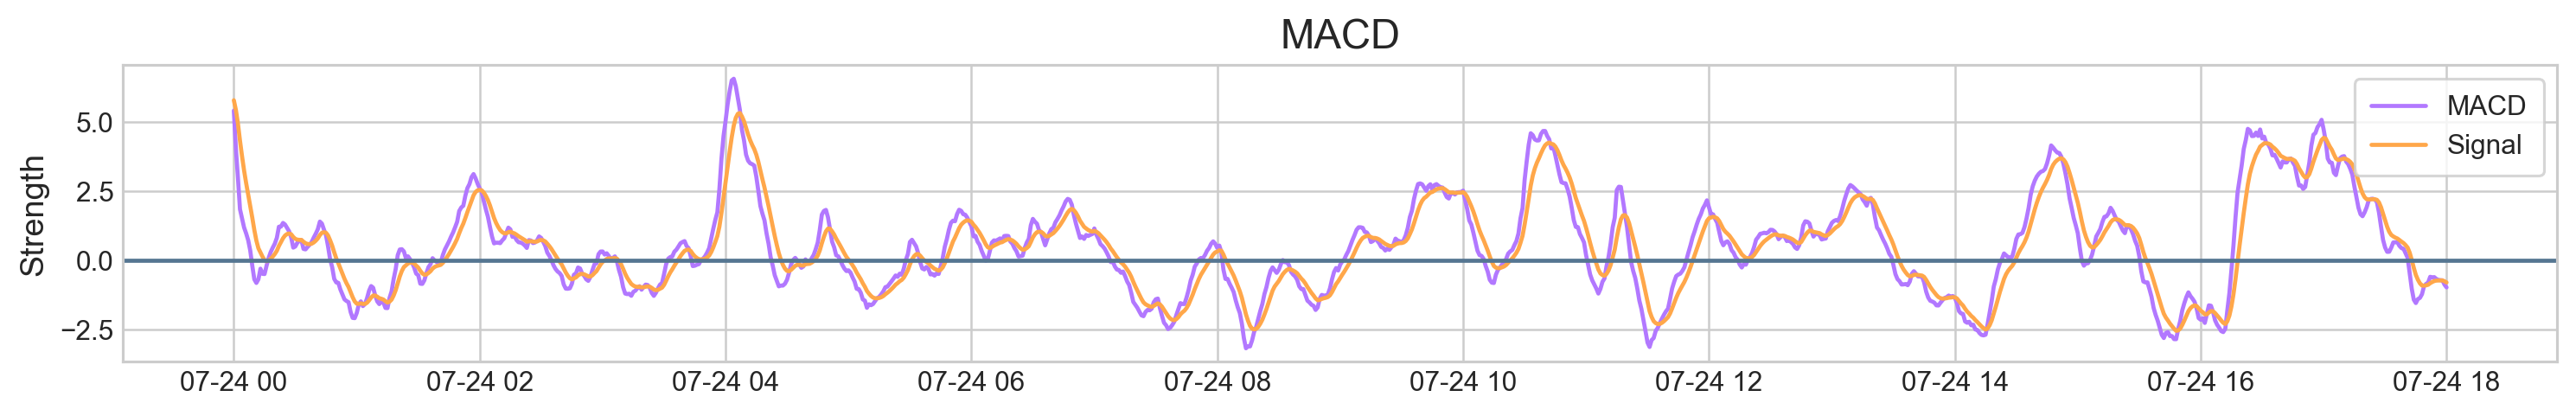

In [6]:
plotting.macd(df.loc['2021-07-24 00:00:00':'2021-07-24 18:00:00'])

Number of Trades: 13
Time Frame: 0 days
Profit: $-1765.90 | -1.77%


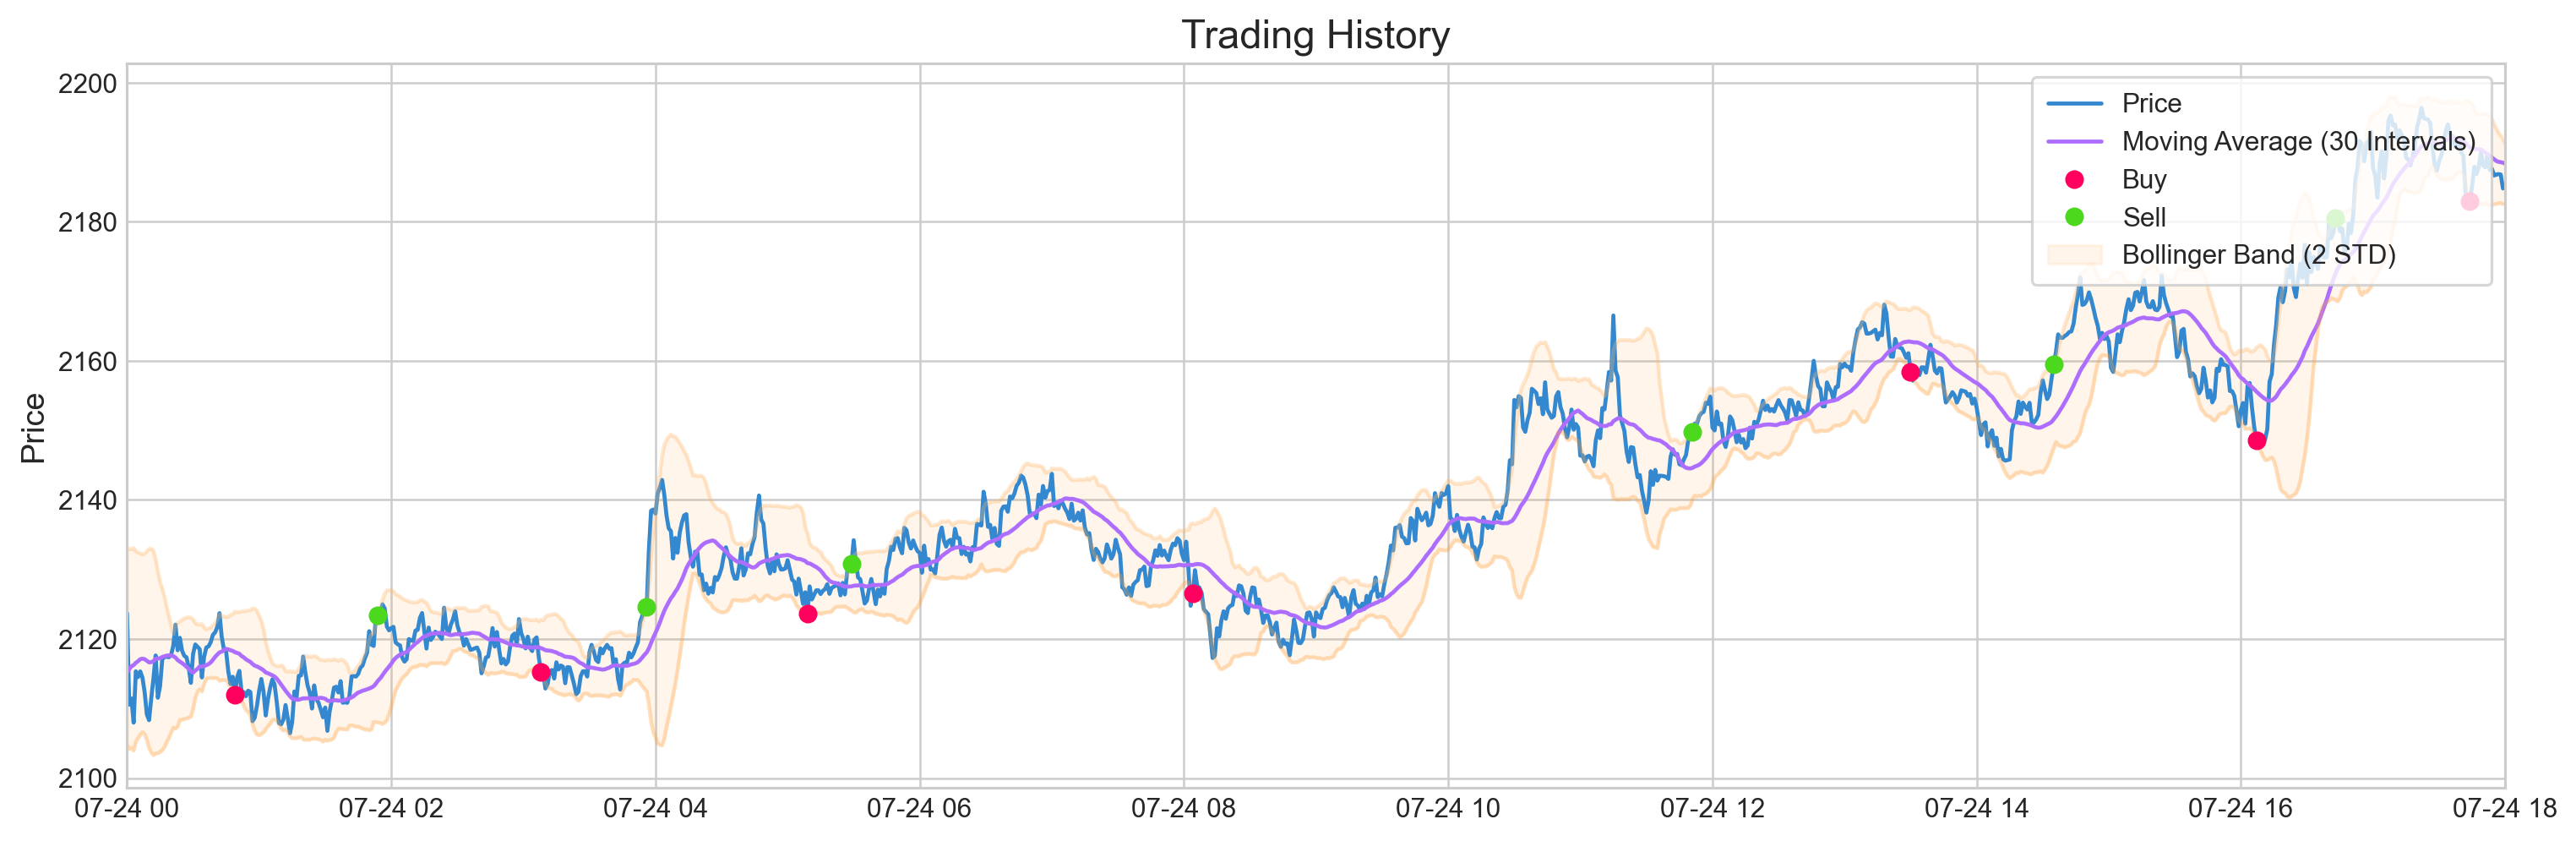

In [7]:
profit, trades = functions.bb_trading(df.loc['2021-07-24 00:00:00':'2021-07-24 18:00:00'], u = 0.0001, l = 0.0001)